In [560]:
from dotenv import load_dotenv
import os
import base64
from requests import post
import json
import pandas as pd
import spotipy
import numpy as np

from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

client_id= os.getenv("CLIENT_ID")
client_secret= os.getenv("CLIENT_SECRET")
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " +auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result =json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return {"Authorization": "Bearer " + token}
token = get_token()

cid = '96de22941f2b474eb7d0521a5f8b0517'
secret = 'fc7b7ed3a43a4bf2be91ab4cdfa13fce'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)



def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True) 

    #Step 3
        
    return playlist_df
call_playlist("san_fran","4pU11224vkmRleI1vPSv2H")

df = call_playlist("san_fran","4pU11224vkmRleI1vPSv2H")



In [561]:
df

,artist,album,track_name,track_id,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.801,0.806,-5.206,1,0.0381,0.000669,0.1140,0.8020,106.999,239318,4
1,Eslabon Armado,Ella Baila Sola,Ella Baila Sola,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,-5.176,0,0.0332,0.000019,0.0837,0.8340,147.989,165671,3
2,"Peter, Paul and Mary",In the Wind,"Don't Think Twice, It's All Right",7IsXXgpowAB48crGjV1oGb,0.437,0.104,-22.533,1,0.0307,0.001240,0.1100,0.5440,101.718,196467,4
3,Coi Leray,Players,Players,6UN73IYd0hZxLi8wFPMQij,0.954,0.516,-5.817,1,0.1600,0.000008,0.0504,0.6240,105.001,139560,4
4,RAYE,Escapism. / The Thrill Is Gone.,Escapism.,5Z2MiIZ5I3jJvvmeWMLbOQ,0.538,0.742,-5.355,1,0.1140,0.000047,0.0934,0.2500,96.107,272373,4
5,Metro Boomin,HEROES & VILLAINS,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,-6.005,0,0.0484,0.000000,0.0822,0.1720,97.950,221520,4
6,Toosii,Favorite Song,Favorite Song,1SRw5p2lVAi7RGlHEmZg66,0.816,0.367,-9.354,1,0.0588,0.000000,0.0987,0.4130,116.035,208630,4
7,SZA,SOS,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,-5.747,1,0.0391,0.144000,0.1610,0.4180,88.980,153947,4
8,Yng Lvcas,La Bebe (Remix),La Bebe - Remix,2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,-5.678,0,0.3330,0.000001,0.0756,0.5590,169.922,234353,4
9,Morgan Wallen,3 Songs At A Time Sampler,Last Night,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,-5.382,1,0.0357,0.000000,0.1510,0.5180,203.853,163855,4


In [562]:
df.dtypes

artist               object
album                object
track_name           object
track_id             object
danceability        float64
energy              float64
loudness            float64
mode                 object
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
dtype: object

In [563]:
print(df.isnull().sum())

artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64


In [564]:
df1 = df.drop(['mode','duration_ms','time_signature'], axis = 1)

In [565]:
 df2 = df1.drop(['artist','album','track_name'], axis = 1) 

In [566]:
df2=df2.set_index('track_id')

In [567]:
# Plotting tool
import matplotlib.pyplot as plt
import seaborn as sns

# Principal component analysis library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaling tool
from sklearn.preprocessing import MinMaxScaler

In [568]:
df2

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_id,,,,,,,,
0WtM2NBVQNNJLh6scP13H8,0.801,0.806,-5.206,0.0381,0.000669,0.1140,0.8020,106.999
3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,-5.176,0.0332,0.000019,0.0837,0.8340,147.989
7IsXXgpowAB48crGjV1oGb,0.437,0.104,-22.533,0.0307,0.001240,0.1100,0.5440,101.718
6UN73IYd0hZxLi8wFPMQij,0.954,0.516,-5.817,0.1600,0.000008,0.0504,0.6240,105.001
5Z2MiIZ5I3jJvvmeWMLbOQ,0.538,0.742,-5.355,0.1140,0.000047,0.0934,0.2500,96.107
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,-6.005,0.0484,0.000000,0.0822,0.1720,97.950
1SRw5p2lVAi7RGlHEmZg66,0.816,0.367,-9.354,0.0588,0.000000,0.0987,0.4130,116.035
1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,-5.747,0.0391,0.144000,0.1610,0.4180,88.980
2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,-5.678,0.3330,0.000001,0.0756,0.5590,169.922


In [569]:
df_numerics_only = df2.select_dtypes(include=np.number)
df_numerics_only

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_id,,,,,,,,
0WtM2NBVQNNJLh6scP13H8,0.801,0.806,-5.206,0.0381,0.000669,0.1140,0.8020,106.999
3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,-5.176,0.0332,0.000019,0.0837,0.8340,147.989
7IsXXgpowAB48crGjV1oGb,0.437,0.104,-22.533,0.0307,0.001240,0.1100,0.5440,101.718
6UN73IYd0hZxLi8wFPMQij,0.954,0.516,-5.817,0.1600,0.000008,0.0504,0.6240,105.001
5Z2MiIZ5I3jJvvmeWMLbOQ,0.538,0.742,-5.355,0.1140,0.000047,0.0934,0.2500,96.107
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,-6.005,0.0484,0.000000,0.0822,0.1720,97.950
1SRw5p2lVAi7RGlHEmZg66,0.816,0.367,-9.354,0.0588,0.000000,0.0987,0.4130,116.035
1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,-5.747,0.0391,0.144000,0.1610,0.4180,88.980
2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,-5.678,0.3330,0.000001,0.0756,0.5590,169.922


In [570]:
df_numerics_only.corr()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.226164,0.290440,0.095045,-0.225489,0.056976,0.406527,-0.122058
energy,0.226164,1.000000,0.700011,-0.164750,-0.061735,-0.144192,0.385064,0.061593
loudness,0.290440,0.700011,1.000000,0.114408,-0.157163,-0.280805,0.154732,0.262764
speechiness,0.095045,-0.164750,0.114408,1.000000,-0.133159,0.026981,-0.132680,0.134105
instrumentalness,-0.225489,-0.061735,-0.157163,-0.133159,1.000000,-0.090023,-0.297129,0.021916
liveness,0.056976,-0.144192,-0.280805,0.026981,-0.090023,1.000000,0.052057,-0.034796
valence,0.406527,0.385064,0.154732,-0.132680,-0.297129,0.052057,1.000000,0.130218
tempo,-0.122058,0.061593,0.262764,0.134105,0.021916,-0.034796,0.130218,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

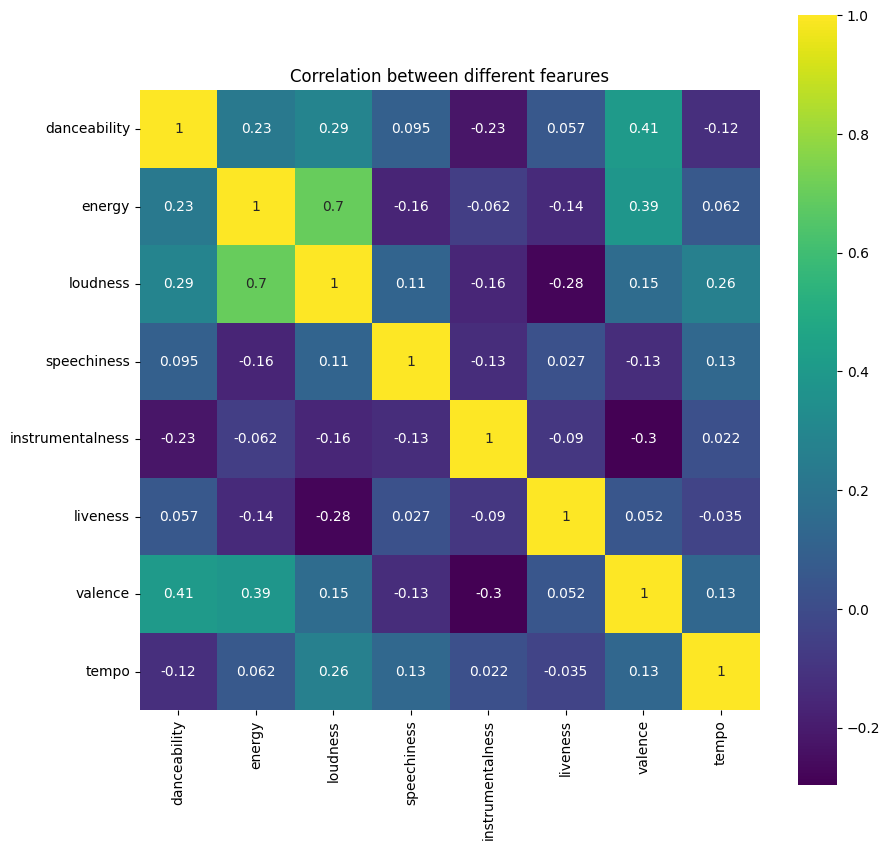

In [571]:
correlation = df_numerics_only.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [572]:
df_numerics_only

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_id,,,,,,,,
0WtM2NBVQNNJLh6scP13H8,0.801,0.806,-5.206,0.0381,0.000669,0.1140,0.8020,106.999
3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,-5.176,0.0332,0.000019,0.0837,0.8340,147.989
7IsXXgpowAB48crGjV1oGb,0.437,0.104,-22.533,0.0307,0.001240,0.1100,0.5440,101.718
6UN73IYd0hZxLi8wFPMQij,0.954,0.516,-5.817,0.1600,0.000008,0.0504,0.6240,105.001
5Z2MiIZ5I3jJvvmeWMLbOQ,0.538,0.742,-5.355,0.1140,0.000047,0.0934,0.2500,96.107
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,-6.005,0.0484,0.000000,0.0822,0.1720,97.950
1SRw5p2lVAi7RGlHEmZg66,0.816,0.367,-9.354,0.0588,0.000000,0.0987,0.4130,116.035
1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,-5.747,0.0391,0.144000,0.1610,0.4180,88.980
2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,-5.678,0.3330,0.000001,0.0756,0.5590,169.922


In [573]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [574]:
df2

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
track_id,,,,,,,,
0WtM2NBVQNNJLh6scP13H8,0.801,0.806,-5.206,0.0381,0.000669,0.1140,0.8020,106.999
3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,-5.176,0.0332,0.000019,0.0837,0.8340,147.989
7IsXXgpowAB48crGjV1oGb,0.437,0.104,-22.533,0.0307,0.001240,0.1100,0.5440,101.718
6UN73IYd0hZxLi8wFPMQij,0.954,0.516,-5.817,0.1600,0.000008,0.0504,0.6240,105.001
5Z2MiIZ5I3jJvvmeWMLbOQ,0.538,0.742,-5.355,0.1140,0.000047,0.0934,0.2500,96.107
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,-6.005,0.0484,0.000000,0.0822,0.1720,97.950
1SRw5p2lVAi7RGlHEmZg66,0.816,0.367,-9.354,0.0588,0.000000,0.0987,0.4130,116.035
1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,-5.747,0.0391,0.144000,0.1610,0.4180,88.980
2UW7JaomAMuX9pZrjVpHAU,0.812,0.479,-5.678,0.3330,0.000001,0.0756,0.5590,169.922


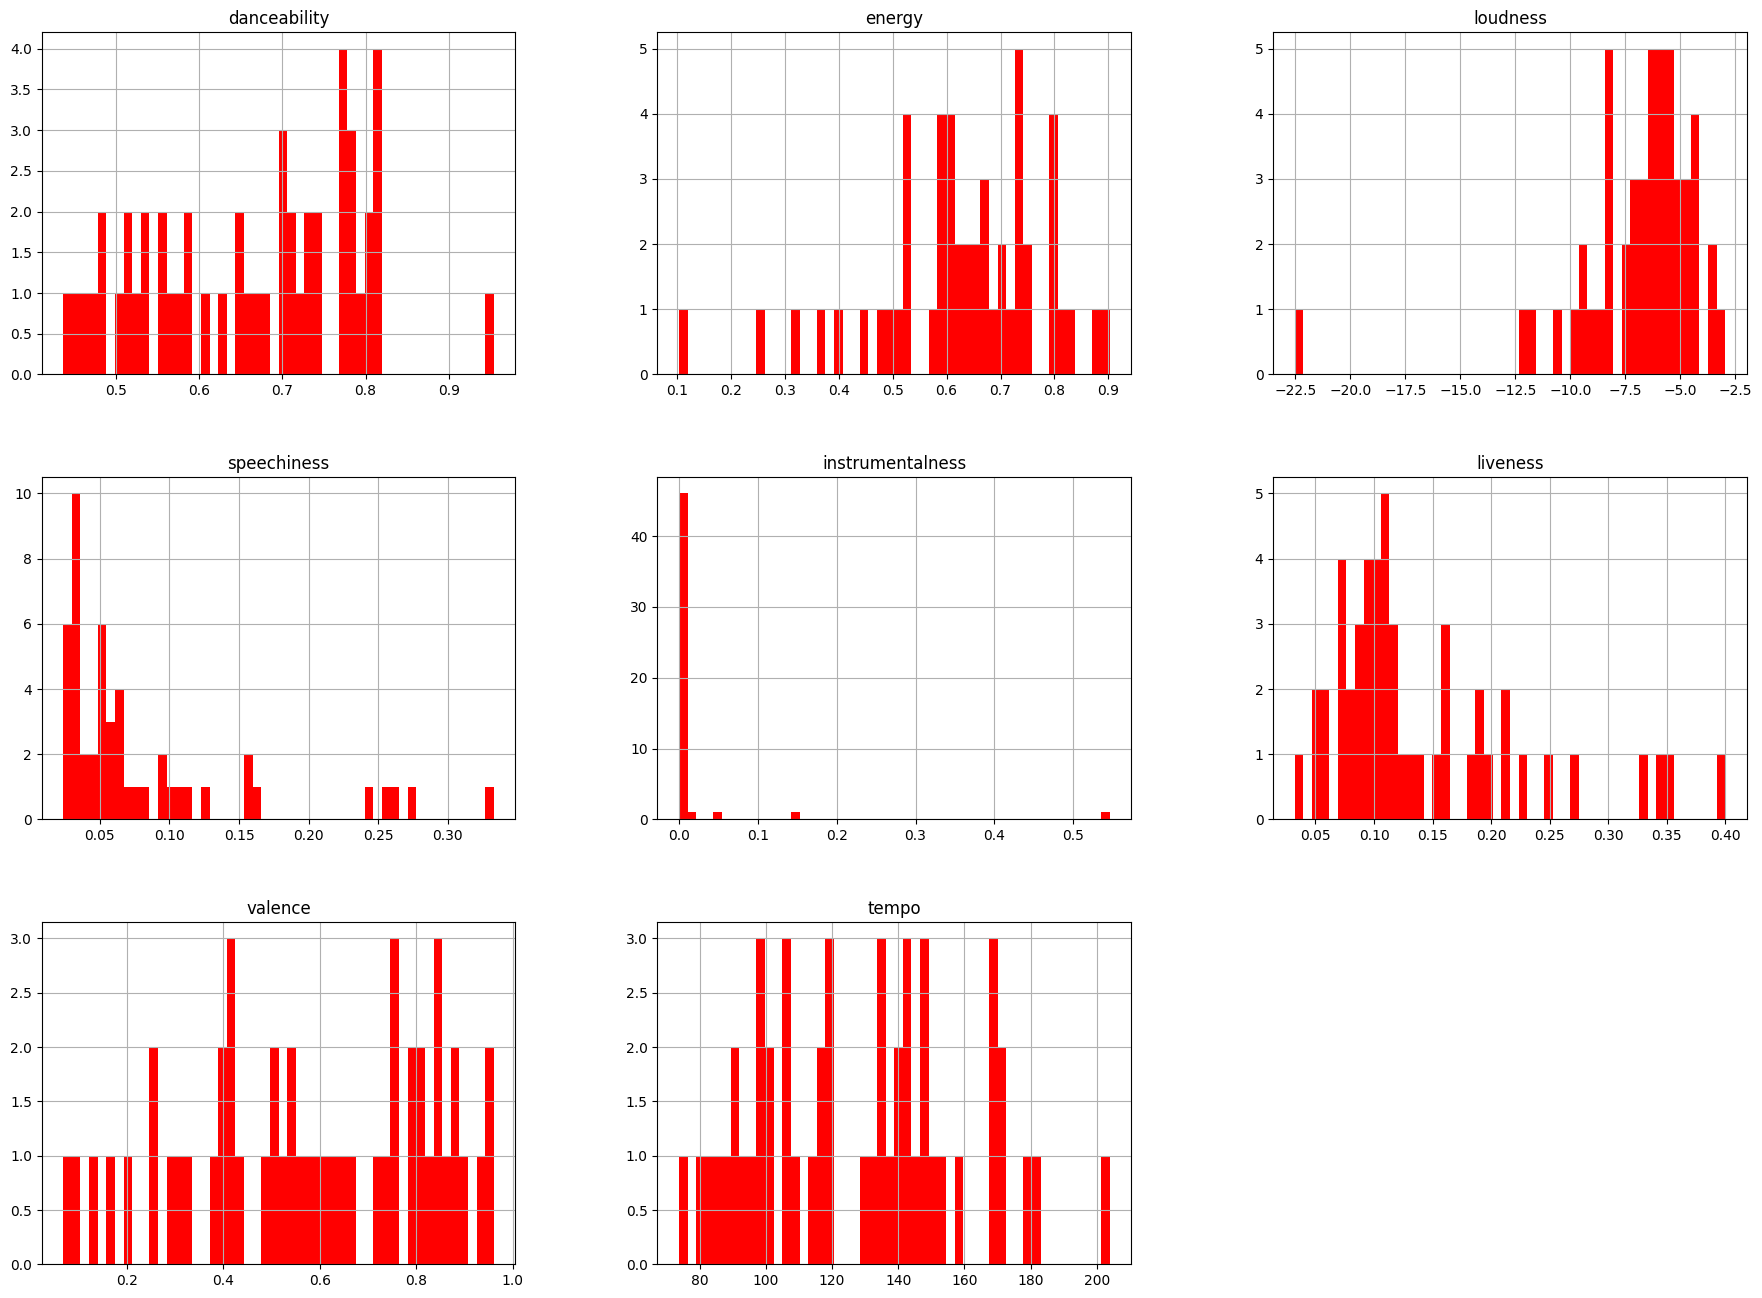

In [575]:
df2.hist(bins=50, figsize=(22,16), color='r')
plt.show()

In [576]:
list_var_X = df2.columns.tolist()

In [577]:
X = scaler.fit_transform(df2)

In [578]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [579]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X) # the list_var_X is used as the column names
df_PrincipleComp

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
0,-0.384476,-0.533992,-0.533273,-0.002078,0.252135,0.132067,-0.425077,-0.144712
1,-0.396175,0.219196,0.331880,-0.059062,0.447596,-0.525878,-0.334552,0.304222
2,-0.001207,-0.244939,0.151052,0.786283,-0.256091,0.056210,-0.171535,0.448084
3,-0.298363,0.020919,-0.134198,-0.298239,0.073272,0.427470,0.350772,0.701745
4,0.334780,0.212133,0.151463,0.210791,0.663100,0.548858,-0.175657,-0.061205
5,-0.461303,0.343735,0.281361,-0.078472,-0.415913,0.451360,-0.399496,-0.217754
6,-0.486922,0.306543,-0.209048,0.482636,0.182857,-0.039135,0.514904,-0.303655
7,0.210312,0.590974,-0.647180,0.076105,-0.137886,-0.116696,-0.315184,0.223412


In [580]:
# install this library if it is not installed
import sys
if 'bioinfokit' not in sys.modules:
    !pip3 install bioinfokit

In [581]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=X_new_components, loadings=pca.components_, 
               labels=df_PrincipleComp.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2))


In [582]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.28116163 0.17664256 0.15297773 0.12408387 0.09879408 0.08823618
 0.05891929 0.01918466]


In [583]:

print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[2.29519697 1.44198012 1.24879781 1.01292956 0.80648231 0.72029532
 0.48097378 0.15660944]


<Axes: xlabel='PC'>

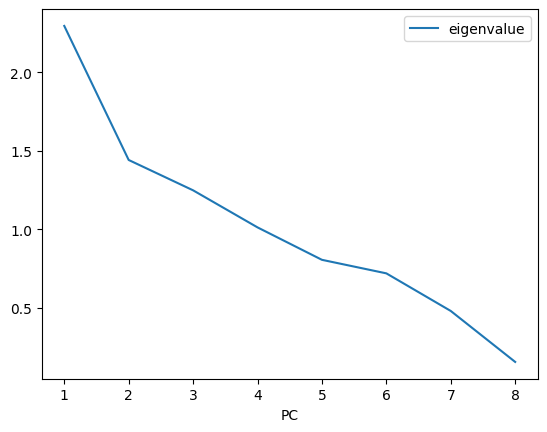

In [584]:
df = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df.plot.line(x = 'PC', y = 'eigenvalue')

In [585]:
from sklearn.cluster import KMeans

In [586]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [587]:
df3=df2.drop(['tempo', 'speechiness', 'liveness', 'instrumentalness',],axis = 1) 

In [602]:
df3.head()

,danceability,energy,loudness,valence
track_id,,,,
0WtM2NBVQNNJLh6scP13H8,0.341959,0.462150,0.217806,0.345319
3dnP0JxCgygwQH9Gm7q7nb,-0.067776,0.330499,0.223887,0.396008
7IsXXgpowAB48crGjV1oGb,-0.779421,-1.463247,-3.294448,-0.063361
6UN73IYd0hZxLi8wFPMQij,0.813309,-0.333242,0.093953,0.063361
5Z2MiIZ5I3jJvvmeWMLbOQ,-0.468269,0.286615,0.187603,-0.529067


In [603]:
normed = df3
for c in df3.columns.values:
    df3[c] = rs.fit_transform(df3[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of danceability is [-0.7794208256315466, 0.8133086876155265]
The range of energy is [-1.4632473944048272, 0.7254525507405376]
The range of loudness is [-3.2944479354590244, 0.6718626477205928]
The range of valence is [-0.8172025978140346, 0.5971804213527642]


,danceability,energy,loudness,valence
track_id,,,,
0WtM2NBVQNNJLh6scP13H8,0.341959,0.462150,0.217806,0.345319
3dnP0JxCgygwQH9Gm7q7nb,-0.067776,0.330499,0.223887,0.396008
7IsXXgpowAB48crGjV1oGb,-0.779421,-1.463247,-3.294448,-0.063361
6UN73IYd0hZxLi8wFPMQij,0.813309,-0.333242,0.093953,0.063361
5Z2MiIZ5I3jJvvmeWMLbOQ,-0.468269,0.286615,0.187603,-0.529067


In [590]:
from scipy.cluster.hierarchy import dendrogram


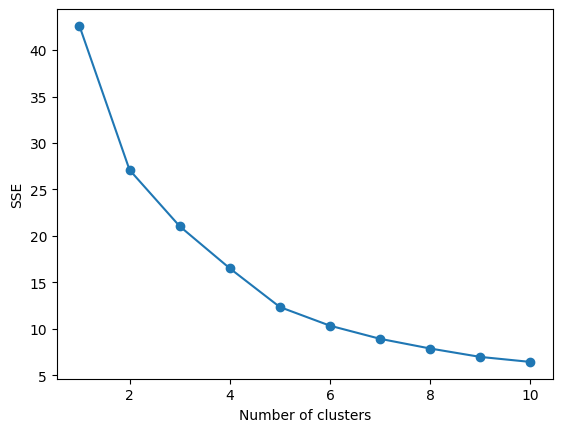

In [591]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [540]:
k_cluster = 5
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
x_transformed = kmeans_method.fit_transform(normed)
print(normed.shape)
print(normed.columns)
# print(kmeans_method.labels_)
print(x_transformed.shape)

for centroid in kmeans_method.cluster_centers_:
    print(np.linalg.norm(np.array(normed)[0] - centroid))
print(x_transformed[0])

(50, 4)
Index(['danceability', 'energy', 'loudness', 'valence'], dtype='object')
(50, 5)
1.0164161904229456
1.0817315624847
4.179425065592138
2.0487535791865175
0.3926627102661859
[1.01641619 1.08173156 4.17942507 2.04875358 0.39266271]


C:\Users\Andrio Emilio\Python37\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [555]:
#Training data

model = KMeans(n_clusters=5)
model.fit(normed)

y = model.predict(normed) #Each song goes to the cluster which has the most similarities in their features
y


C:\Users\Andrio Emilio\Python37\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 3, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 4, 2, 2,
       0, 2, 4, 4, 4, 2])

In [595]:
df4 = normed.copy()

In [597]:
df4['Clusters']=pd.Series(y, index=df4.index)

In [605]:
df4.head()

,danceability,energy,loudness,valence,Clusters
track_id,,,,,
0WtM2NBVQNNJLh6scP13H8,0.341959,0.462150,0.217806,0.345319,2
3dnP0JxCgygwQH9Gm7q7nb,-0.067776,0.330499,0.223887,0.396008,2
7IsXXgpowAB48crGjV1oGb,-0.779421,-1.463247,-3.294448,-0.063361,3
6UN73IYd0hZxLi8wFPMQij,0.813309,-0.333242,0.093953,0.063361,0
5Z2MiIZ5I3jJvvmeWMLbOQ,-0.468269,0.286615,0.187603,-0.529067,1


In [600]:
df4.index[0]

'0WtM2NBVQNNJLh6scP13H8'

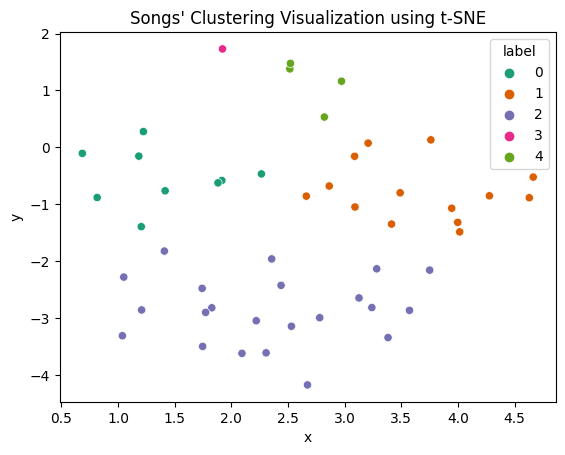

In [601]:

from sklearn.manifold import TSNE

tsne_obj = TSNE()
tsne = tsne_obj.fit_transform(normed)

tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])
tsne_df['label'] = y

sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='Dark2')
plt.title("Songs' Clustering Visualization using t-SNE")
plt.show()

In [631]:
pca=PCA(2)

In [633]:
pca_data = pd.DataFrame(pca.fit_transform(normed),columns=['PC1','PC2']) 

In [634]:
pca_data

,PC1,PC2
0,-0.704064,-0.380402
1,-0.556976,-0.182764
2,3.437553,-0.721068
3,-0.251416,-0.461927
4,-0.215122,0.711684
5,-0.041037,0.456876
6,0.701234,-0.236113
7,-0.274736,0.303125
8,-0.098180,-0.127844
9,-0.192598,0.437297


In [646]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

C:\Users\Andrio Emilio\Python37\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

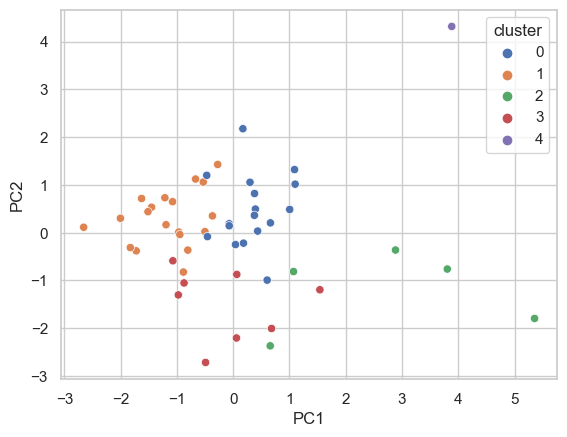

In [648]:
kmeans =KMeans(n_clusters=5).fit(X)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [604]:
tsne_df.head()

,x,y,label
0,2.306805,-3.611240,2
1,2.529929,-3.144397,2
2,1.921934,1.729914,3
3,0.816063,-0.881755,0
4,4.277197,-0.851104,1


In [645]:
silhouette_score(df, clusters)

0.37072961630735224

In [184]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

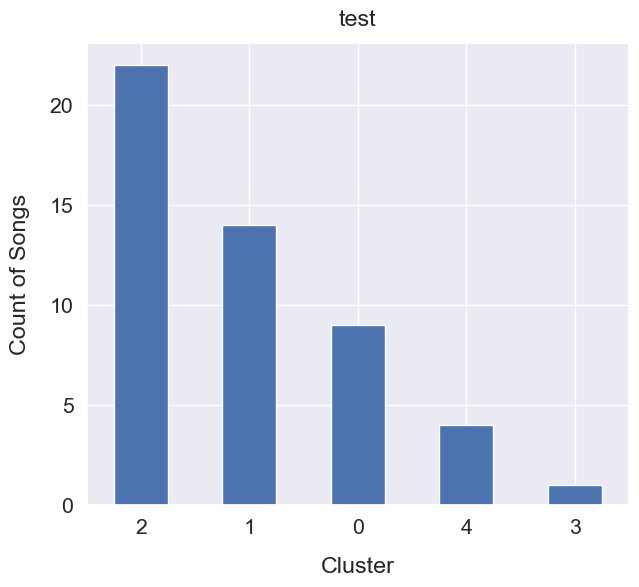

In [606]:
sns.set(font_scale=1.4)
df4['Clusters'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Cluster", labelpad=14)
plt.ylabel("Count of Songs", labelpad=14)
plt.title("test", y=1.02);

(<Axes: xlabel='Clusters', ylabel='valence'>,)

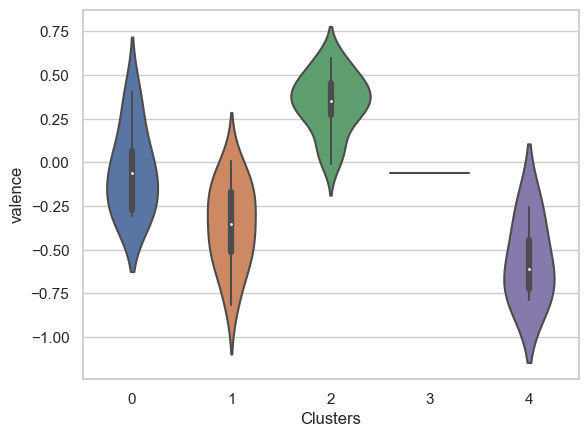

In [615]:
import seaborn
    
    
seaborn.set(style = 'whitegrid') 
sns.violinplot(data=df4, x="Clusters", y="valence"), 

(<Axes: xlabel='Clusters', ylabel='energy'>,)

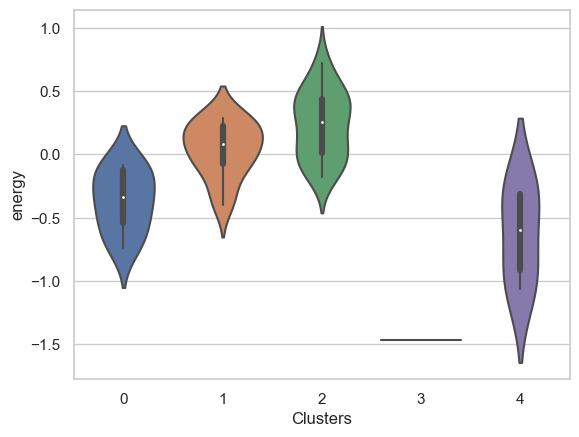

In [613]:
sns.violinplot(data=df4, x="Clusters", y="energy"),

(<Axes: xlabel='Clusters', ylabel='danceability'>,)

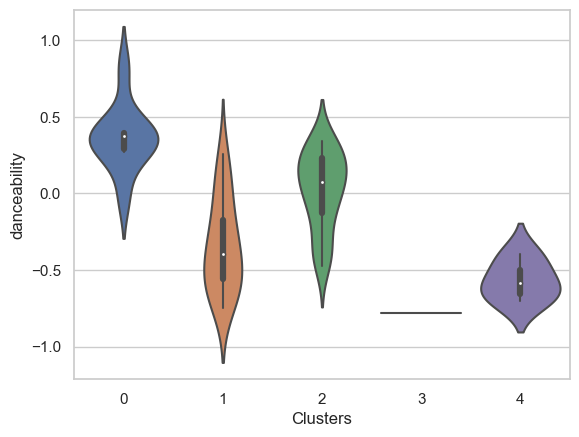

In [614]:
sns.violinplot(data=df4, x="Clusters", y="danceability"),